In [729]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [730]:
D = 2000

In [731]:
begin = np.random.randn(D).astype(np.float32)

In [732]:
A = np.random.randn(D).astype(np.float32)
B = np.random.randn(D).astype(np.float32)
C = np.random.randn(D).astype(np.float32)

In [733]:
S = np.array([begin, A, B, A, B], dtype=np.float32)
S.shape

(5, 2000)

In [734]:
# creat 4 positionnal embeddings
P = np.random.randn(5, D).astype(np.float32)
P.shape

(5, 2000)

In [735]:
X =  P/5 +S

In [736]:
QK = (P[1].reshape(D, 1) @ P[0].reshape(1, D)) + (P[2].reshape(D, 1) @ P[1].reshape(1, D)) + (P[3].reshape(D, 1) @ P[2].reshape(1, D)) + (P[4].reshape(D, 1) @ P[3].reshape(1, D))
QK.shape

(2000, 2000)

In [737]:
# get attention matrix
Att = X @ QK @ (X.T)
Att.shape

(5, 5)

In [738]:
def softmax(x, axis=None):
    x_max = np.max(x, axis=axis, keepdims=True)
    e_x = np.exp(x - x_max)
    return e_x / np.sum(e_x, axis=axis, keepdims=True)


In [739]:
Att = softmax(Att, axis=1)

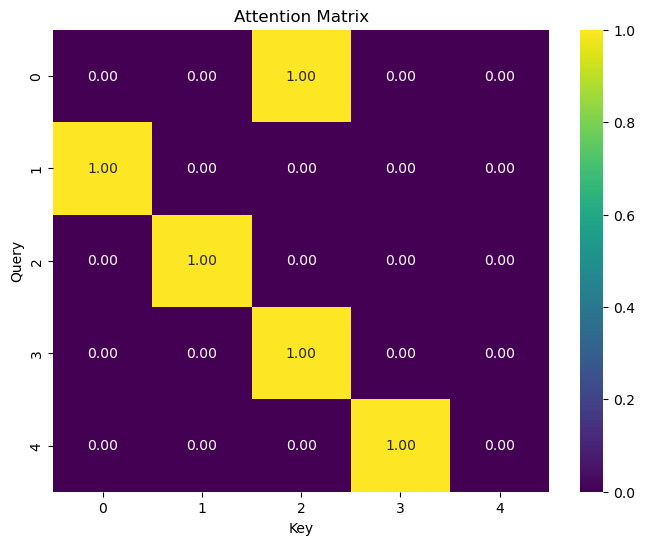

In [740]:
# plot the attention matrix
plt.figure(figsize=(8, 6))
sns.heatmap(Att, annot=True, fmt=".2f", cmap="viridis")
plt.title("Attention Matrix")
plt.xlabel("Key")
plt.ylabel("Query")
plt.show()


In [741]:
V = np.random.randn(D, D).astype(np.float32)
V.shape

(2000, 2000)

In [742]:
(X @ V)/np.linalg.norm(X @ V)@ (V@A/np.linalg.norm(V@A))

array([-0.01142558, -0.00770881, -0.01048377, -0.00581521, -0.01080479],
      dtype=float32)

In [743]:
(V@A).T@(V@A)

4136070.8

In [744]:
Z@ (V@A/np.linalg.norm(V@A))

array([ 0.0014653 ,  0.02382789,  0.00459367,  0.01644807, -0.0131624 ],
      dtype=float32)

In [745]:
Z = (Att @ X @ V)/np.linalg.norm(Att @ X @ V)+X/np.linalg.norm(X)
Z.shape

(5, 2000)

In [746]:
Sem_A =  V.T@A/np.linalg.norm(V.T@A)
Sem_B = V.T@B/np.linalg.norm(V.T@B)
Sem_C = V.T@C/np.linalg.norm(V.T@C)

In [747]:
Sem_A.shape

(2000,)

In [748]:
QK2 = (Sem_A.reshape(D,1)@Sem_A.reshape(1,D)) + (Sem_B.reshape(D,1)@Sem_B.reshape(1,D)) + (Sem_C.reshape(D,1)@Sem_C.reshape(1,D)) + ((A/np.linalg.norm(A)).reshape(D,1)@(A/np.linalg.norm(A)).reshape(1,D)) + ((B/np.linalg.norm(B)).reshape(D,1)@(B/np.linalg.norm(B)).reshape(1,D)) + ((C/np.linalg.norm(C)).reshape(D,1)@(C/np.linalg.norm(C)).reshape(1,D))

In [ ]:
QK2 = 

In [749]:
Att2 = Z  @ (Z.T)

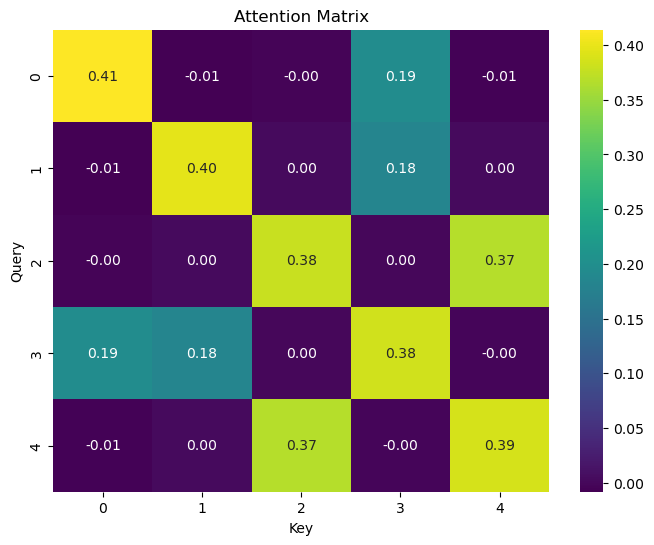

In [750]:
# plot the attention matrix
plt.figure(figsize=(8, 6))
sns.heatmap(Att2, annot=True, fmt=".2f", cmap="viridis")
plt.title("Attention Matrix")
plt.xlabel("Key")
plt.ylabel("Query")
plt.show()
